In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sbn

In [41]:
x = pd.read_csv('dataset/train.csv')
y = x.pop('Survived')

In [42]:
x.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [44]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [45]:
x['Age'].value_counts(dropna=False).head()

NaN      177
 24.0     30
 22.0     27
 18.0     26
 28.0     25
Name: Age, dtype: int64

In [46]:
x['Age'].fillna(x['Age'].mean(), inplace=True)

In [47]:
x['Embarked'].value_counts(dropna=False).head()

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [48]:
x['Embarked'].fillna('S', inplace=True)

In [49]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [50]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
# del x['Name']

In [52]:
del x['Ticket']

In [53]:
del x['PassengerId']

In [54]:
#x = x.fillna(0)
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [55]:
# convert sex categorical to numeric
x['Sex'].replace(['female','male'],[0,1],inplace=True)

In [56]:
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,S
4,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,S


In [57]:
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return 'None'
x['Cabin'] = x['Cabin'].apply(clean_cabin)

In [58]:
x['Cabin'].head()

0    None
1       C
2    None
3       C
4    None
Name: Cabin, dtype: object

In [59]:
#x.fillna(0)
x['Cabin'].value_counts(dropna=False).head()

None    687
C        59
B        47
D        33
E        32
Name: Cabin, dtype: int64

In [60]:
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,None,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,C
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,None,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C,S
4,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,None,S


In [61]:
x['Age'].value_counts(dropna=False).head()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
Name: Age, dtype: int64

In [62]:
x['Age'].value_counts(dropna=False)

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
30.000000     25
19.000000     25
21.000000     24
25.000000     23
36.000000     22
29.000000     20
35.000000     18
26.000000     18
32.000000     18
27.000000     18
31.000000     17
16.000000     17
23.000000     15
34.000000     15
33.000000     15
20.000000     15
39.000000     14
40.000000     13
42.000000     13
17.000000     13
45.000000     12
38.000000     11
4.000000      10
50.000000     10
2.000000      10
            ... 
0.830000       2
30.500000      2
0.750000       2
57.000000      2
55.000000      2
70.000000      2
10.000000      2
32.500000      2
71.000000      2
63.000000      2
28.500000      2
45.500000      2
40.500000      2
59.000000      2
14.500000      1
0.670000       1
12.000000      1
0.920000       1
74.000000      1
34.500000      1
70.500000      1
36.500000      1
24.500000      1
66.000000      1
80.000000      1
55.500000      1
53.000000      1
20.500000     

In [63]:
def age_band(dl):
    if  dl <= 10.0 : return 'Age_band_1'
    elif 10.0 < dl <= 20.0 : return 'Age_band_2'
    elif 20.0 < dl <= 30.0 : return 'Age_band_3'
    elif 30.0 < dl <= 40.0 : return 'Age_band_4'
    elif 40.0 < dl <= 50.0 : return 'Age_band_5'
    elif 50.0 < dl <= 60.0 : return 'Age_band_6'
    elif 60.0 < dl <= 70.0 : return 'Age_band_7'
    elif 70.0 < dl <= 80.0 : return 'Age_band_8'
    elif 80.0 < dl <= 90.0 : return 'Age_band_9'
    elif 90.0 < dl <= 100.0 : return 'Age_band_10'

x['Age'] = x['Age'].map(age_band)

In [64]:
x['Age'].value_counts(dropna=False)

Age_band_3    407
Age_band_4    155
Age_band_2    115
Age_band_5     86
Age_band_1     64
Age_band_6     42
Age_band_7     17
Age_band_8      5
Name: Age, dtype: int64

In [65]:
#sbn.pairplot(x, kind = 'reg')

In [66]:
(x['Fare']>290).value_counts(dropna=False)

False    888
True       3
Name: Fare, dtype: int64

In [67]:
def fare2(dl):
    if  dl <= 300 : return dl
    elif 300 < dl  : return 300
    #else: return 'None'

x['Fare'] = x['Fare'].map(fare2)
x['Fare'].value_counts(dropna=False)

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
7.2292      15
26.5500     15
0.0000      15
8.6625      13
7.2500      13
7.8542      13
7.2250      12
9.5000       9
16.1000      9
24.1500      8
15.5000      8
31.2750      7
14.5000      7
56.4958      7
52.0000      7
69.5500      7
14.4542      7
7.0500       7
30.0000      6
46.9000      6
26.2500      6
27.9000      6
            ..
9.4750       1
13.4167      1
26.3875      1
14.1083      1
12.2750      1
211.5000     1
42.4000      1
40.1250      1
50.4958      1
221.7792     1
10.5167      1
12.6500      1
32.3208      1
8.0292       1
15.0500      1
22.0250      1
22.5250      1
17.4000      1
8.1375       1
81.8583      1
61.9792      1
7.1417       1
7.8000       1
8.6833       1
7.0458       1
8.1125       1
25.9250      1
13.8583      1
7.6292       1
34.0208      1
Name: Fare, Length: 248, dtype: int64

In [68]:
x['Fare'].value_counts(dropna=False)

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
7.2292      15
26.5500     15
0.0000      15
8.6625      13
7.2500      13
7.8542      13
7.2250      12
9.5000       9
16.1000      9
24.1500      8
15.5000      8
31.2750      7
14.5000      7
56.4958      7
52.0000      7
69.5500      7
14.4542      7
7.0500       7
30.0000      6
46.9000      6
26.2500      6
27.9000      6
            ..
9.4750       1
13.4167      1
26.3875      1
14.1083      1
12.2750      1
211.5000     1
42.4000      1
40.1250      1
50.4958      1
221.7792     1
10.5167      1
12.6500      1
32.3208      1
8.0292       1
15.0500      1
22.0250      1
22.5250      1
17.4000      1
8.1375       1
81.8583      1
61.9792      1
7.1417       1
7.8000       1
8.6833       1
7.0458       1
8.1125       1
25.9250      1
13.8583      1
7.6292       1
34.0208      1
Name: Fare, Length: 248, dtype: int64

In [69]:
(x['Fare']>300).value_counts(dropna=False)

False    891
Name: Fare, dtype: int64

In [70]:
# create dummy variables at a time for all categorical variable

categorical_variable = ['Age','Pclass','Cabin','Embarked']

for variable in categorical_variable:
    # create missing data wirth 'Missing' world
    x[variable].fillna('Missing', inplace=True)
    # Create array od fummys
    dummies = pd.get_dummies(x[variable], prefix=variable)
    # Update  x to tindicate dummies and drop the main variable
    
    x= pd.concat([x, dummies], axis=1)
    x.drop([variable], axis=1, inplace=True)
    

In [71]:
x.head()

,Name,Sex,SibSp,Parch,Fare,Age_Age_band_1,Age_Age_band_2,Age_Age_band_3,Age_Age_band_4,Age_Age_band_5,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,"Braund, Mr. Owen Harris",1,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,71.2833,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,"Heikkinen, Miss. Laina",0,0,0,7.9250,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,53.1000,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,"Allen, Mr. William Henry",1,0,0,8.0500,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [72]:
del x['Cabin_T']

In [73]:
x.head()

,Name,Sex,SibSp,Parch,Fare,Age_Age_band_1,Age_Age_band_2,Age_Age_band_3,Age_Age_band_4,Age_Age_band_5,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Embarked_C,Embarked_Q,Embarked_S
0,"Braund, Mr. Owen Harris",1,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,71.2833,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,"Heikkinen, Miss. Laina",0,0,0,7.9250,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,53.1000,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,"Allen, Mr. William Henry",1,0,0,8.0500,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [74]:
type(x)

pandas.core.frame.DataFrame

In [869]:
#x['Fare'].plot(kind='scatter', figsize=(7,6))
# N=50 l = plt.scatter(x['Fare'],l)
#sbn.pairplot(x, kind = 'reg')

In [870]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(x,y)
print('C-stat', roc_auc_score(y, model.oob_prediction_))

C-stat 0.8610738290778555


In [871]:
model.feature_importances_
srt =pd.Series(model.feature_importances_,index=x.columns)
type(srt)

pandas.core.series.Series

In [872]:
srt = srt.sort_values(axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

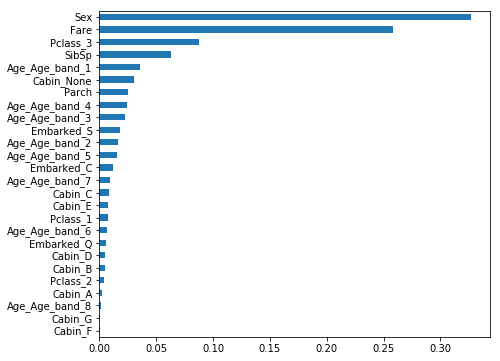

In [873]:
%matplotlib inline
#feature = pd.Series(model.feature_importances_, index=x.columns)
#feature.sort()
srt.plot(kind='barh', figsize=(7,6))

In [874]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(x,y)

4.07 s ± 539 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [875]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(x,y)

3.2 s ± 116 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


30 Trees
C-stat 0.8551726158139733
 
50 Trees
C-stat 0.8583895226834543
 
100 Trees
C-stat 0.8610738290778555
 
200 Trees
C-stat 0.8612868692678874
 
500 Trees
C-stat 0.863624985353487
 
1000 Trees
C-stat 0.8647940433962867
 
2000 Trees
C-stat 0.8640883477668062
 


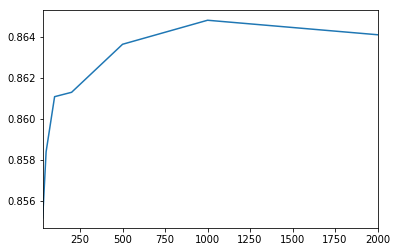

In [876]:
# n_estimator

result = []
n_estimator_option = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_option:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(x,y)
    print(trees, 'Trees')
    roc = roc_auc_score(y, model.oob_prediction_)
    print('C-stat', roc)
    result.append(roc)
    print(" ")

pd.Series(result, n_estimator_option).plot();

auto option
C-stat 0.8647940433962867
 
None option
C-stat 0.8647940433962867
 
sqrt option
C-stat 0.8644984501326176
 
log2 option
C-stat 0.8621496820375163
 
0.9 option
C-stat 0.8655050650305182
 
0.2 option
C-stat 0.8644984501326176
 


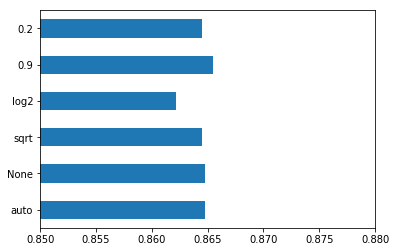

In [877]:
# Max_features 

result = []
max_feature_option = ['auto', None, 'sqrt', 'log2', 0.9,0.2]

for max_features in max_feature_option:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(x,y)
    print(max_features, 'option')
    roc = roc_auc_score(y, model.oob_prediction_)
    print('C-stat', roc)
    result.append(roc)
    print(' ')
   
pd.Series(result, max_feature_option).plot(kind="barh", xlim=(.85,.88))

1 min samples
C-stat 0.8647940433962867
 
2 min samples
C-stat 0.86996559400931
 
3 min samples
C-stat 0.8730120687267653
 
4 min samples
C-stat 0.8755845290213999
 
5 min samples
C-stat 0.8772462425036482
 
6 min samples
C-stat 0.8782688354158011
 
7 min samples
C-stat 0.8774166746556739
 
8 min samples
C-stat 0.8768414661425878
 
9 min samples
C-stat 0.8748601923752916
 
10 min samples
C-stat 0.8721705599761396
 


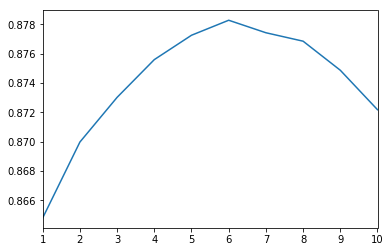

In [878]:
# min_sample_leaf

result =[]
min_sample_leaf_option = [1,2,3,4,5,6,7,8,9,10]

for min_samples in min_sample_leaf_option:
    model = RandomForestRegressor(n_estimators=1000,
                                 oob_score=True,
                                 n_jobs= -1,
                                 random_state= 42,
                                 max_features='auto',
                                 min_samples_leaf=min_samples)
    model.fit(x,y)
    print(min_samples, 'min samples')
    roc = roc_auc_score(y, model.oob_prediction_)
    print('C-stat', roc)
    result.append(roc)
    print(' ')

pd.Series(result, min_sample_leaf_option).plot()

In [218]:
# final model we find all best values

In [879]:
model = RandomForestRegressor(n_estimators=1000,
                             oob_score=True,
                             n_jobs=-1,
                             random_state=42,
                             max_features='auto',
                             min_samples_leaf=6)
model.fit(x,y)
roc= roc_auc_score(y, model.oob_prediction_)
print('C-stat : ', roc)

result= model.fit(x,y)

C-stat :  0.8782688354158011


In [880]:
result

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [881]:
x.head()

,Sex,SibSp,Parch,Fare,Age_Age_band_1,Age_Age_band_2,Age_Age_band_3,Age_Age_band_4,Age_Age_band_5,Age_Age_band_6,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Embarked_C,Embarked_Q,Embarked_S
0,1,1,0,7.2500,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,1,0,71.2833,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,7.9250,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,1,0,53.1000,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,0,8.0500,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [882]:
test_data = pd.read_csv('dataset/test.csv')

In [883]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [884]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [885]:
test_data['Sex'].replace(['female','male'],[0,1],inplace=True)

In [886]:
PassengerId = test_data[['PassengerId']]

In [887]:
del test_data['Name']

In [888]:
del test_data['Ticket']

In [889]:
del test_data['PassengerId']

In [890]:
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

In [891]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [892]:
def clean_cabin(test_data):
    try:
        return test_data[0]
    except TypeError:
        return 'None'
test_data['Cabin'] = test_data['Cabin'].apply(clean_cabin)

In [893]:
test_data['Cabin'].head()

0    None
1    None
2    None
3    None
4    None
Name: Cabin, dtype: object

In [894]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Cabin       418 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [895]:
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

In [896]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Cabin       418 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [897]:
test_data['Age'] = test_data['Age'].map(age_band)

In [898]:
test_data['Age'].value_counts(dropna=False)

Age_band_4    141
Age_band_3    131
Age_band_2     47
Age_band_5     46
Age_band_1     22
Age_band_6     20
Age_band_7     10
Age_band_8      1
Name: Age, dtype: int64

In [899]:
test_data['Fare'] = test_data['Fare'].map(fare2)
test_data['Fare'].value_counts(dropna=False)

7.750000      21
26.000000     19
8.050000      17
13.000000     17
10.500000     11
7.895800      11
7.775000      10
7.229200       9
7.225000       9
21.000000      8
8.662500       8
7.854200       8
26.550000      7
27.720800      6
7.879200       6
262.375000     5
7.925000       5
7.250000       5
7.550000       4
7.795800       4
69.550000      4
14.500000      4
15.245800      4
211.500000     4
59.400000      3
13.775000      3
23.000000      3
13.500000      3
221.779200     3
31.387500      3
              ..
50.495800      1
7.720800       1
39.400000      1
34.375000      1
76.291700      1
7.850000       1
7.725000       1
9.225000       1
15.741700      1
13.862500      1
6.950000       1
61.175000      1
227.525000     1
78.850000      1
20.212500      1
247.520800     1
7.575000       1
28.537500      1
22.358300      1
35.627188      1
108.900000     1
6.495800       1
7.629200       1
47.100000      1
17.400000      1
9.325000       1
14.458300      1
15.033300     

In [900]:
# create dummy variables at a time for all categorical variable

categorical_variable2 = ['Age','Pclass','Cabin','Embarked']

for variable2 in categorical_variable2:
    # create missing data wirth 'Missing' world
    test_data[variable2].fillna('Missing', inplace=True)
    # Create array od fummys
    dummies = pd.get_dummies(test_data[variable2], prefix=variable2)
    # Update  x to tindicate dummies and drop the main variable
    
    test_data= pd.concat([test_data, dummies], axis=1)
    test_data.drop([variable2], axis=1, inplace=True)

In [901]:
test_data.head()

,Sex,SibSp,Parch,Fare,Age_Age_band_1,Age_Age_band_2,Age_Age_band_3,Age_Age_band_4,Age_Age_band_5,Age_Age_band_6,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,7.8292,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,1,0,7.0000,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,9.6875,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,0,0,8.6625,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,1,1,12.2875,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [902]:
x.head()

,Sex,SibSp,Parch,Fare,Age_Age_band_1,Age_Age_band_2,Age_Age_band_3,Age_Age_band_4,Age_Age_band_5,Age_Age_band_6,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Embarked_C,Embarked_Q,Embarked_S
0,1,1,0,7.2500,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,1,0,71.2833,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,7.9250,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,1,0,53.1000,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,0,8.0500,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [903]:
#del x

In [904]:
# model.predict(test_data)
Survived= model.predict(test_data)

In [905]:
type(test_data)

pandas.core.frame.DataFrame

In [906]:
type(Survived)

numpy.ndarray

In [907]:
Survived = np.where(Survived > 0.5, 1, 0)

In [908]:
Survived
Survived = pd.DataFrame(Survived)

In [909]:
Survived=Survived.rename(columns = {0:'Survived'})
#type(Survived)
Survived.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [910]:
final = pd.concat([test_data,Survived], axis=1)

In [911]:
final.head()

,Sex,SibSp,Parch,Fare,Age_Age_band_1,Age_Age_band_2,Age_Age_band_3,Age_Age_band_4,Age_Age_band_5,Age_Age_band_6,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Embarked_C,Embarked_Q,Embarked_S,Survived
0,1,0,0,7.8292,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,1,0,7.0000,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
2,1,0,0,9.6875,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,1,0,0,8.6625,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,1,1,12.2875,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1


In [912]:
final = pd.concat([test_data,Survived], axis=1)

In [913]:
# result fo kaggle

kaggle = pd.concat([PassengerId, Survived], axis=1)

In [914]:
kaggle.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [915]:
kaggle.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.342105
std,120.810458,0.474983
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [916]:
kaggle['Survived'].value_counts(dropna=False).head()

0    275
1    143
Name: Survived, dtype: int64

In [917]:
pd.DataFrame.to_csv(kaggle, path_or_buf='Submission5.csv',index=False)